In [8]:
import networkx
import random

Optimal path from Central Hub to Industrial Zone: ['Central Hub', 'Industrial Zone']


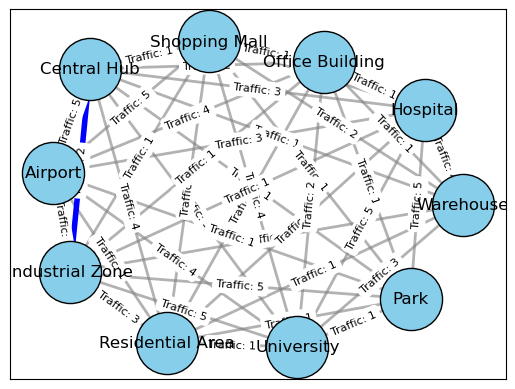

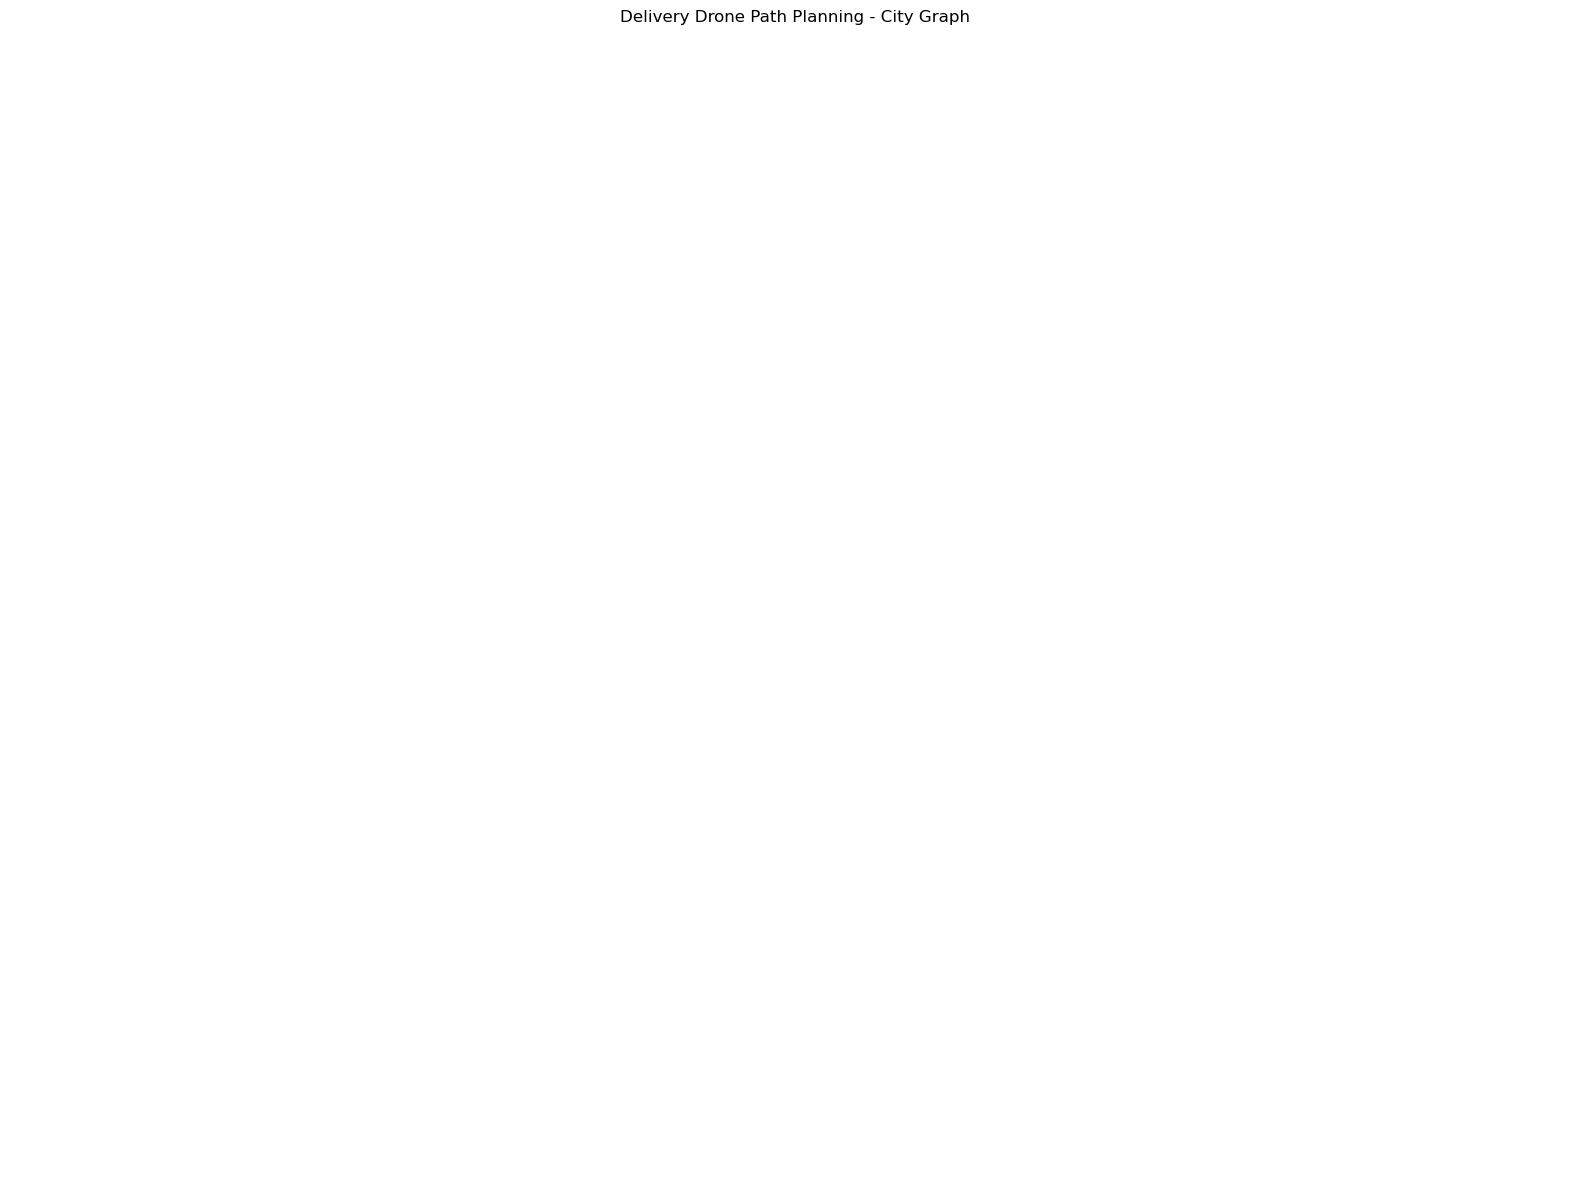

In [2]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import math

# To compute straight-line distance (heuristic function)
def heuristic(node1, node2, pos):
    (x1, y1) = pos[node1]
    (x2, y2) = pos[node2]
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

# A* algorithm implementation
def a_star_algorithm(graph, start, goal, pos):
    open_set = set([start])
    came_from = {}
    g_score = {node: float('inf') for node in graph.nodes()}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph.nodes()}
    f_score[start] = heuristic(start, goal, pos)

    while open_set:
        current = min(open_set, key=lambda node: f_score[node])
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        open_set.remove(current)
        for neighbor in graph.neighbors(current):
            tentative_g_score = g_score[current] + graph[current][neighbor]['distance']
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal, pos)
                if neighbor not in open_set:
                    open_set.add(neighbor)

    return None

# Creating a Graph
G = nx.Graph()

# Define locations and their coordinates
locations = {
    "Central Hub": (0, 0),
    "Warehouse": (0, 4),
    "Residential Area": (2, 1),
    "Shopping Mall": (3, 3),
    "Park": (1, 3),
    "Office Building": (4, 4),
    "Airport": (5, 0),
    "University": (6, 2),
    "Hospital": (3, 5),
    "Industrial Zone": (6, 4)
}

# Define edges between locations and their distances, traffic, and urgency
edges = [
    ("Central Hub", "Warehouse", {"distance": 4}),
    ("Central Hub", "Residential Area", {"distance": 3}),
    ("Central Hub", "Shopping Mall", {"distance": 4}),
    ("Central Hub", "Park", {"distance": 3}),
    ("Central Hub", "Office Building", {"distance": 5}),
    ("Central Hub", "Airport", {"distance": 5}),
    ("Central Hub", "University", {"distance": 6}),
    ("Central Hub", "Hospital", {"distance": 6}),
    ("Central Hub", "Industrial Zone", {"distance": 7}),
    ("Warehouse", "Residential Area", {"distance": 2}),
    ("Warehouse", "Shopping Mall", {"distance": 5}),
    ("Warehouse", "Office Building", {"distance": 6}),
    ("Warehouse", "University", {"distance": 7}),
    ("Warehouse", "Hospital", {"distance": 2}),
    ("Warehouse", "Industrial Zone", {"distance": 8}),
    ("Residential Area", "Shopping Mall", {"distance": 3}),
    ("Residential Area", "Park", {"distance": 1}),
    ("Residential Area", "Office Building", {"distance": 6}),
    ("Residential Area", "Airport", {"distance": 7}),
    ("Residential Area", "University", {"distance": 5}),
    ("Residential Area", "Hospital", {"distance": 3}),
    ("Residential Area", "Industrial Zone", {"distance": 8}),
    ("Shopping Mall", "Park", {"distance": 2}),
    ("Shopping Mall", "Office Building", {"distance": 4}),
    ("Shopping Mall", "Airport", {"distance": 5}),
    ("Shopping Mall", "University", {"distance": 7}),
    ("Shopping Mall", "Hospital", {"distance": 1}),
    ("Shopping Mall", "Industrial Zone", {"distance": 9}),
    ("Park", "Office Building", {"distance": 3}),
    ("Park", "Airport", {"distance": 4}),
    ("Park", "University", {"distance": 6}),
    ("Park", "Hospital", {"distance": 3}),
    ("Park", "Industrial Zone", {"distance": 7}),
    ("Office Building", "Airport", {"distance": 4}),
    ("Office Building", "University", {"distance": 5}),
    ("Office Building", "Hospital", {"distance": 6}),
    ("Office Building", "Industrial Zone", {"distance": 8}),
    ("Airport", "University", {"distance": 3}),
    ("Airport", "Hospital", {"distance": 5}),
    ("Airport", "Industrial Zone", {"distance": 6}),
    ("University", "Hospital", {"distance": 4}),
    ("University", "Industrial Zone", {"distance": 5}),
    ("Hospital", "Industrial Zone", {"distance": 3}),
]

# Adding nodes with coordinates to the graph
for location, coordinates in locations.items():
    G.add_node(location, pos=coordinates)

# Adding edges with random traffic and urgency values
for source, target, edge_attrs in edges:
    edge_attrs['traffic'] = random.randint(1, 5)
    edge_attrs['urgency'] = random.randint(1, 5)
    G.add_edge(source, target, **edge_attrs)

# Setting node positions
pos = nx.spring_layout(G, k=5)  # Further increase the spacing between nodes

# Finding the optimal path using A* algorithm
start_node = "Central Hub"
goal_node = "Industrial Zone"
path = a_star_algorithm(G, start_node, goal_node, pos)
print(f'Optimal path from {start_node} to {goal_node}: {path}')

# Drawing nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue', edgecolors='black')

# Drawing edges
nx.draw_networkx_edges(G, pos, width=2, alpha=0.6, edge_color='gray')

# Highlighting the optimal path
if path:
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=4, edge_color='blue')

# Drawing edge labels (only showing traffic)
edge_labels = {(u, v): f'Traffic: {data["traffic"]}' for u, v, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Drawing node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Setting plot title and display
plt.figure(figsize=(16, 12))  # Adjust figure size
plt.title("Delivery Drone Path Planning - City Graph")
plt.axis('off')  # Turn off axis
plt.tight_layout()  # Adjust layout
plt.show()
